# Тема “Обучение с учителем”

**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [32]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

In [33]:
data = boston.data
feature_names = boston.feature_names
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [35]:
target = boston.target
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [38]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210
1,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094
2,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338
3,-0.396825,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875
4,0.167084,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687


Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [39]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_embeded = tsne.fit_transform(X_train_scaled, y_train)
X_embeded.shape

(404, 2)

Постройте диаграмму рассеяния на этих данных.

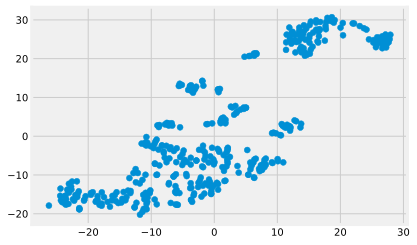

In [40]:
xe = X_embeded[:, 0]
ye = X_embeded[:, 1]
plt.scatter(xe, ye)

**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [41]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)
train_labels = model.fit_predict(X_embeded)
train_labels

array([1, 2, 0, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 1, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0,
       2, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2,
       2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 0,
       0, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2,
       0, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1,
       1, 2, 1, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 0,
       1, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

In [42]:
centers = model.cluster_centers_
centers

array([[-14.244046  , -14.966708  ],
       [ 17.371805  ,  25.432062  ],
       [  0.35576582,  -1.7581235 ]], dtype=float32)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

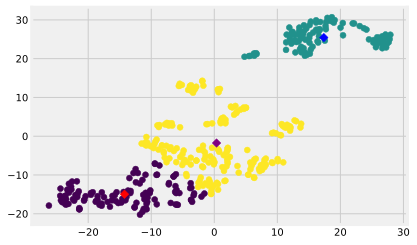

In [46]:
plt.scatter(xe, ye, c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color=['red','blue','purple'])

Вычислите средние значения price и CRIM в разных кластерах.

In [66]:
def get_cluster(cluster_number):
    return np.where(model.labels_ == cluster_number)[0]

In [108]:
crim_price_df = pd.DataFrame(
    np.array([
        (y_train.iloc[get_cluster(0), :].price.mean(), X_train.iloc[get_cluster(0), :].CRIM.mean()),
        (y_train.iloc[get_cluster(1), :].price.mean(), X_train.iloc[get_cluster(1), :].CRIM.mean()),
        (y_train.iloc[get_cluster(2), :].price.mean(), X_train.iloc[get_cluster(2), :].CRIM.mean()),
    ]),
    columns=['price', 'CRIM']
)

In [110]:
crim_price_df.sort_values('price').head()

,price,CRIM
1,16.277228,13.179822
2,24.343617,0.622781
0,25.993043,0.085578


Text(0.5, 0, 'Avrage CRIM')

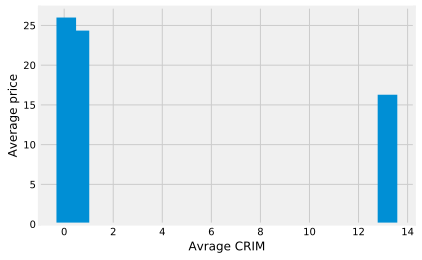

In [116]:
plt.bar(crim_price_df.CRIM, crim_price_df.price)
plt.ylabel('Average price')
plt.xlabel('Avrage CRIM')
